## Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


import os

from sklearn.model_selection import train_test_split


# Downland Dataset

In [4]:
# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

PATH = os.path.join(path, 'Exam_Score_Prediction.csv')
print("Path to dataset files:", PATH)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2/Exam_Score_Prediction.csv


# Getting Data, tiding up data and data split

In [23]:
data = pd.read_csv(PATH)
data.drop('student_id', axis=1, inplace=True) # We do not need it
data.drop(data[data['gender'] == 'other'].index, inplace=True)

y = data['exam_score']
X = data.drop('exam_score', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,male,b.com,5.74,81.4,yes,7.5,good,online videos,high,hard,95.0
19993,19,female,ba,3.28,73.3,yes,9.5,good,group study,high,easy,93.9
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# Feature Engineering
Some data is qualitative, so we need to make it quantitative

# Data Exploration and Visualisations

## Target Data

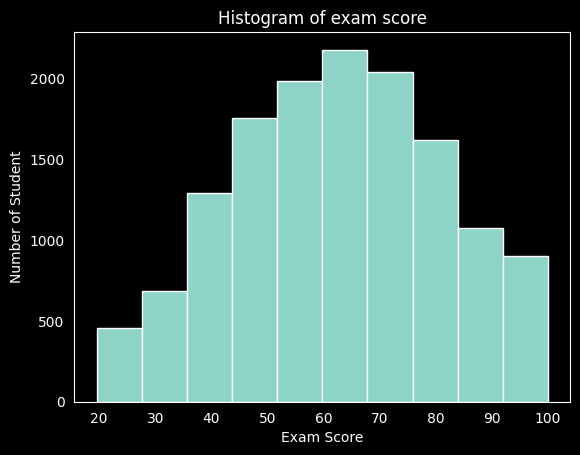

In [13]:
plt.hist(y_train)
plt.grid(False)
plt.title('Histogram of exam score')
plt.ylabel('Number of Student')
plt.xlabel('Exam Score')
plt.show()

## Correlation matrix

In [14]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="RdBu_r")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

ValueError: could not convert string to float: 'female'